# EDA on groceries data

This project aims to perform exploratory data analysis on a [groceries dataset](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset) downloaded from Kaggle. 

Project aims:
1. Identify buying patterns of individuals
1. Seasonality in a year
1. Most popular items

Please note that this dataset is to perform Market Basket Analysis, where we can find combinations of grocery items that frequently bought together. However, here, we first look into this dataset to perform EDA as a start.

## Data ingestion and Preprocessing

Importing numpy and pandas

In [4]:
import numpy as np
import pandas as pd

Importing visualization libraries and setting '%matplotlib inline' to display plots/graphs just below the cell

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Read in the csv file as a dataframe called df

In [6]:
df = pd.read_csv('Groceries_dataset.csv')

Checking the head of the df

In [7]:
df.head()
#this dataset has details of grocery items bought in a specific date alongwith a unique member number

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Checking dimentions of the dataframe

In [8]:
df.shape

(38765, 3)

Check the info() of the df 

In [9]:
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Renaming all column headers

In [10]:
df.columns = ['memberID', 'date', 'item']

Number of uniques members

In [11]:
df['memberID'].nunique()

3898

Number of uniques items

In [12]:
df['item'].nunique()

167

Looking into first five unique grocery items

In [20]:
df['item'].unique().tolist()[:10]

['tropical fruit',
 'whole milk',
 'pip fruit',
 'other vegetables',
 'rolls/buns',
 'pot plants',
 'citrus fruit',
 'beef',
 'frankfurter',
 'chicken']

Diaplay null values if available

<Figure size 432x288 with 0 Axes>

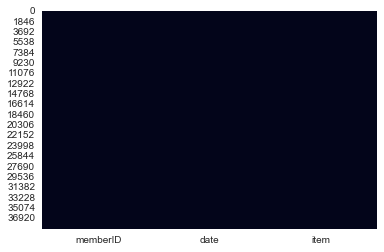

<Figure size 432x288 with 0 Axes>

In [21]:
sns.heatmap(df.isnull(), cbar=False)
plt.figure()
#df does not contain null values

Uniqueness of each member

In [22]:
df['memberID'].value_counts()
#some members do not vist the store frequently
#however, that may not impact the sales analysis

3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: memberID, Length: 3898, dtype: int64

checking date range of the dataset

In [23]:
df['date'].min()

'01-01-2014'

In [24]:
df['date'].max()
#dataset has information for the whole years 2014 and 2015

'31-10-2015'

## Creating new features

Creating new columns for date, month, year and day of the month by converting the date column

In [30]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)

df['day'] = df['date'].apply(lambda time: time.dayofweek)
df['month'] = df['date'].apply(lambda time: time.month)
df['year'] = df['date'].apply(lambda time: time.year)
df['dayofmonth'] = df['date'].apply(lambda time: time.day)

Assigning days of the week instead of numbers

In [31]:
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day'] = df['day'].map(daymap)
df.head()

,memberID,date,item,day,month,year,dayofmonth
0,1808,2015-07-21,tropical fruit,Tue,7,2015,21
1,2552,2015-05-01,whole milk,Fri,5,2015,1
2,2300,2015-09-19,pip fruit,Sat,9,2015,19
3,1187,2015-12-12,other vegetables,Sat,12,2015,12
4,3037,2015-01-02,whole milk,Fri,1,2015,2


Let's explore the data to identify buying patterns by simple visualizations

# EDA

**Monthly sales of all items**

<AxesSubplot:xlabel='month', ylabel='item'>

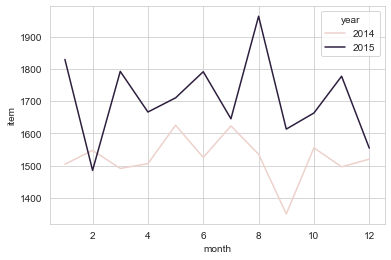

In [32]:
sns.lineplot(x='month',y='item',data=df.groupby(['month','year']).count(),hue='year')
#Overall, sales in 2015 is high compared to the sales in 2014. 
#For 2015, lowest sales are recorded in February and those are less than the sales recorded in 2014
#We may need more data to find a reason for this huge drop of sales in February, 2015

Let's compare the sales of two specific items

**Whole milk and coffee sales by month**

Creating a new dataframe which contains 'whole milk' and 'coffee' sales 

In [33]:
dfMilkChocolate=df[(df['item']=='whole milk')|(df['item']=='coffee')]

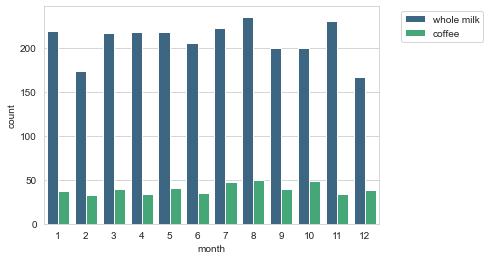

In [34]:
sns.countplot(x='month',data=dfMilkChocolate,hue='item',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
#whole milk is more popular than coffee

Exploring whole milk sales by years

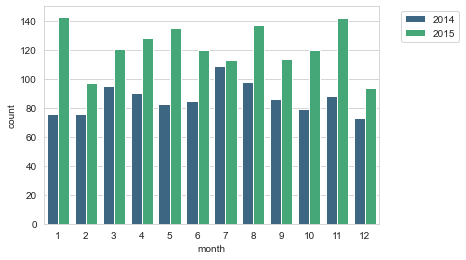

In [35]:
sns.countplot(x='month',data=df[(df['item']=='whole milk')],hue='year',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
#overall whole milk sales in 2015 is high compared to 2014

Let's see we can find buying patterns of an individual customer

**Buying patterns of one member**

Text(0.5, 1.0, 'Monthly buying pattern')

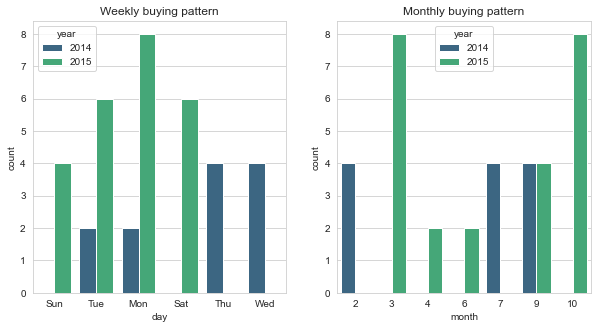

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.countplot(ax=axes[0],x='day',data=df[df['memberID']==3180],hue='year',palette='viridis')
axes[0].set_title('Weekly buying pattern')

sns.countplot(ax=axes[1],x='month',data=df[df['memberID']==3180],hue='year',palette='viridis')
axes[1].set_title('Monthly buying pattern')

#The member 3180 mostly visited the store on Mondays in 2015 and used to visit the store a maximum of 8 times in two months.

Now look what we can find from end of year sales data

**End of year sales in December**

Creating a mask to extract data between 20th December to 31st December 

In [37]:
mask=(df['date'] >= '2014-12-20') & (df['date'] <= '2014-12-31')|(df['date'] >= '2015-12-20') & (df['date'] <= '2015-12-31')
dfEndDec=df.loc[mask]
dfEndDec.head()

,memberID,date,item,day,month,year,dayofmonth
7,3803,2015-12-23,pot plants,Wed,12,2015,23
66,4162,2015-12-22,red/blush wine,Tue,12,2015,22
84,4851,2015-12-20,sausage,Sun,12,2015,20
92,4010,2015-12-29,pork,Tue,12,2015,29
97,2555,2015-12-23,whole milk,Wed,12,2015,23


<AxesSubplot:xlabel='dayofmonth', ylabel='count'>

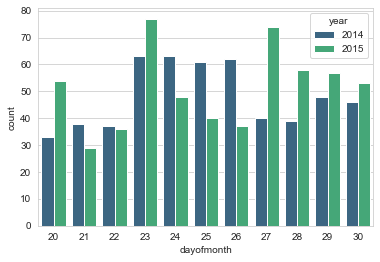

In [38]:
sns.countplot(x='dayofmonth',data=dfEndDec,hue='year',palette='viridis')
#Most of the end of year sales occured from the 23rd to 26th in 2014, but no such pattern is observed in 2015.
#However, during the christmas period, most sales occured on the 23rd and 27th in 2015.

We next plot heatmaps to identify seasonality of buying grocery items. From these graphs, we can filter out most popular items bought throughout the year. This analysis is a simple way to get some basic insights. 

**Identifying seasonality and popular grocery items sold in year 2014**

In [39]:
df_2014 = df[df['year']==2014].groupby(by=['item','month']).count()['year'].unstack()
df_2014=df_2014.fillna(0)

<AxesSubplot:xlabel='month', ylabel='item'>

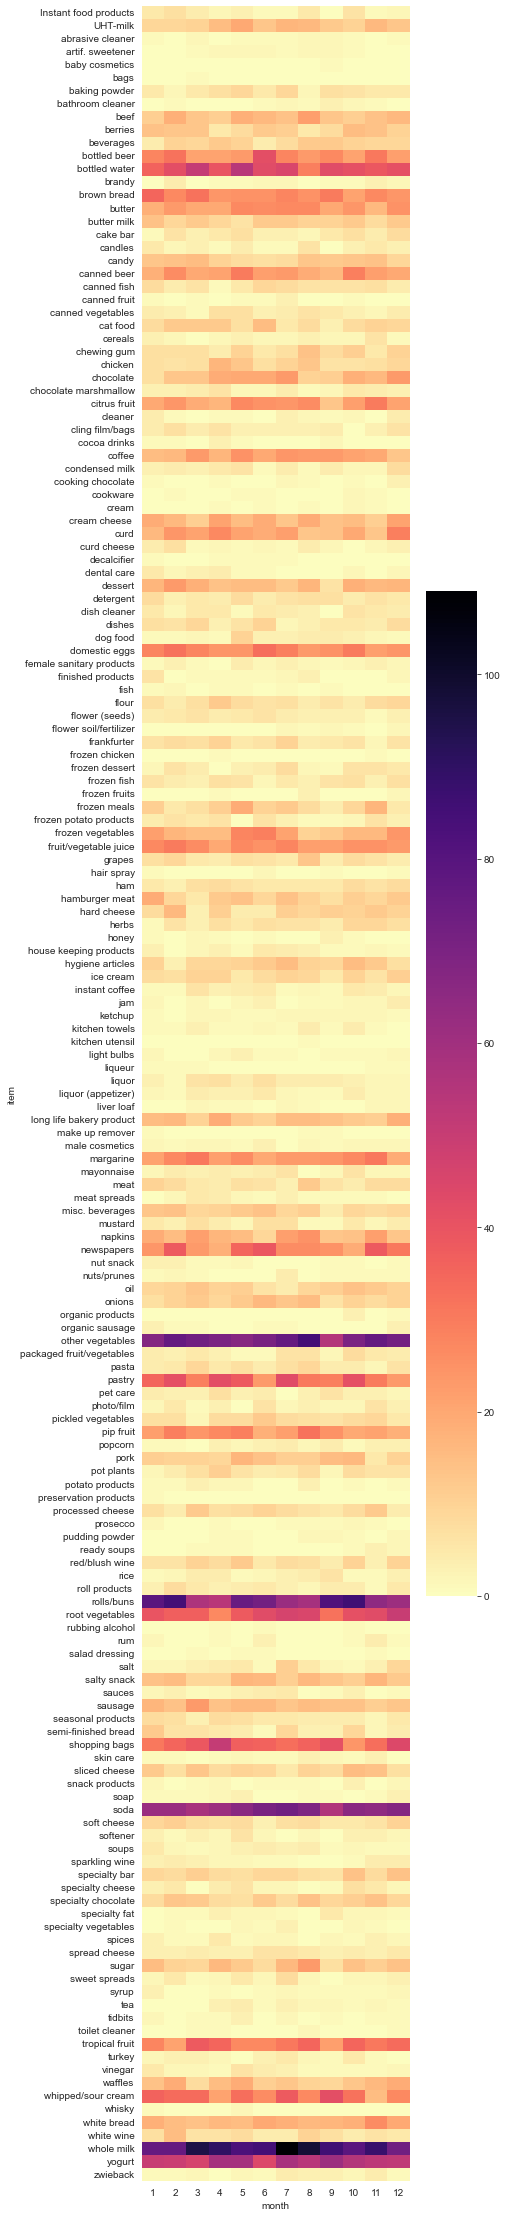

In [40]:
plt.figure(figsize=(6,40))
sns.heatmap(df_2014,cmap='magma_r')

#some popular items like whole milk, yoghurt, soda, rolls/buns and other vegetables sold throughut the year despite seasonality.
#No clear evidance to show the impact of seasonality in buying patterns. 
#However this heatmap clearly shows the most popular items bought in 2014 in contrasting with the least items bought.

Then, we plot cluster maps to see interconnected items that bought together. 

**Clustering similar products sold in year 2014**

<Figure size 432x13680 with 0 Axes>

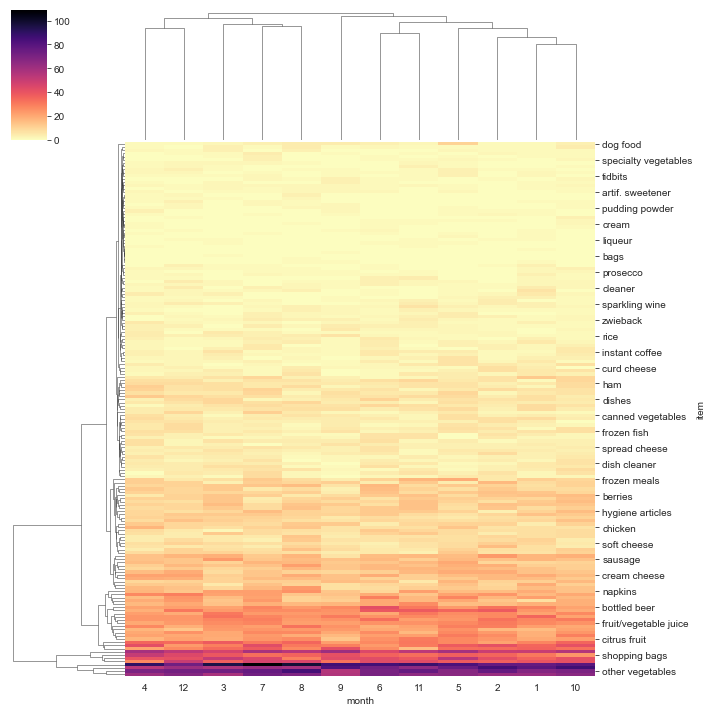

In [41]:
plt.figure(figsize=(6,190))
sns.clustermap(df_2014,cmap='magma_r')
#No seasonality is observed.
#One evidence is that bottled beer, fruit/vegetable juice, citrus fruits can be clustered into one group.